In [1]:
%matplotlib inline
%load_ext nb_black

<IPython.core.display.Javascript object>


# Examples of design matrices

Three examples of design matrices specification and computation for first-level
fMRI data analysis (event-related design, block design, FIR design).

This examples requires matplotlib.


In [2]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    raise RuntimeError("This script needs the matplotlib library")

<IPython.core.display.Javascript object>

## Define parameters
At first, we define parameters related to the images acquisition.



In [3]:
import numpy as np

tr = 1.0  # repetition time is 1 second
n_scans = 128  # the acquisition comprises 128 scans
frame_times = np.arange(n_scans) * tr  # here are the correspoding frame times

<IPython.core.display.Javascript object>

Then we define parameters related to the experimental design.



In [6]:
# these are the types of the different trials
conditions = ["c0", "c0", "c0", "c1", "c1", "c1", "c3", "c3", "c3"]
duration = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# these are the corresponding onset times
onsets = [30.0, 70.0, 100.0, 10.0, 30.0, 90.0, 30.0, 40.0, 60.0]

# Next, we simulate 6 motion parameters jointly observed with fMRI acquisitions
motion = np.cumsum(np.random.randn(n_scans, 6), 0)

# The 6 parameters correspond to three translations and three
# rotations describing rigid body motion
add_reg_names = ["tx", "ty", "tz", "rx", "ry", "rz"]

<IPython.core.display.Javascript object>

In [21]:
np.cumsum?

<IPython.core.display.Javascript object>

## Create design matrices
The same parameters allow us to obtain a variety of design matrices.
We first create an events object.



In [7]:
import pandas as pd

events = pd.DataFrame({"trial_type": conditions, "onset": onsets, "duration": duration})

<IPython.core.display.Javascript object>

We sample the events into a design matrix, also including additional
regressors.



In [17]:
from nilearn.glm.first_level import make_first_level_design_matrix

hrf_model = "spm"

X1 = make_first_level_design_matrix(
    frame_times,
    events,
    drift_model="polynomial",
    drift_order=3,
    add_regs=motion,
    add_reg_names=add_reg_names,
    hrf_model=hrf_model,
)

<IPython.core.display.Javascript object>

Now we compute a block design matrix. We add duration to create the blocks.
For this we first define an event structure that includes the duration
parameter.



In [18]:
duration = 7.0 * np.ones(len(conditions))
events = pd.DataFrame({"trial_type": conditions, "onset": onsets, "duration": duration})

<IPython.core.display.Javascript object>

Then we sample the design matrix.



In [19]:
X2 = make_first_level_design_matrix(
    frame_times, events, drift_model="polynomial", drift_order=3, hrf_model=hrf_model
)

<IPython.core.display.Javascript object>

Finally we compute a FIR model



In [13]:
events = pd.DataFrame({"trial_type": conditions, "onset": onsets, "duration": duration})

hrf_model = "FIR"

X3 = make_first_level_design_matrix(
    frame_times,
    events,
    hrf_model="fir",
    drift_model="polynomial",
    drift_order=3,
    fir_delays=np.arange(1, 6),
)

<IPython.core.display.Javascript object>

Here are the three designs side by side.



Text(0.5, 1.0, 'FIR design matrix')

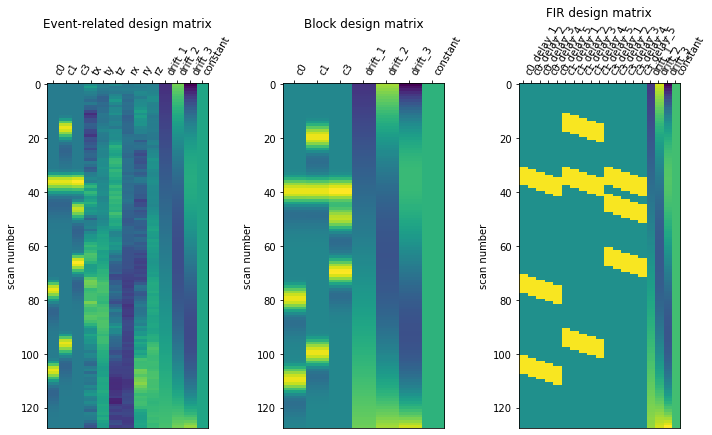

<IPython.core.display.Javascript object>

In [15]:
from nilearn.plotting import plot_design_matrix

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10, 6), nrows=1, ncols=3)

plot_design_matrix(X1, ax=ax1)
ax1.set_title("Event-related design matrix", fontsize=12)

plot_design_matrix(X2, ax=ax2)
ax2.set_title("Block design matrix", fontsize=12)

plot_design_matrix(X3, ax=ax3)
ax3.set_title("FIR design matrix", fontsize=12)

Let's improve the layout and show the result.



In [16]:
plt.subplots_adjust(left=0.08, top=0.9, bottom=0.21, right=0.96, wspace=0.3)
plt.show()

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>